# INTRODUCCIÓN

La cadena de gimnacios Model Fitness está trabajando en una estrategia de interacción con el cliente para combatir la cancelación. 

Gracias a la base de datos proporcionada, se analizará y elaborará una estrategia de retención de clientes para Model Fitness. Esto será posible creando predicciones para el próximo mes, agrupando a los clientes, analizando factores importantes y sacando conclusiones para mejorar la atención al cliente.

# TABLA DE CONTENIDO

# 1. Análisis exploratorio de datos (EDA)
# 2. Construcción de modelo predictorio
# 3. Clústeres de usuarios
# 4. Conclusiones y recomendaciones

In [1]:
#importando los paquetes

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.express as px
from sklearn.metrics import davies_bouldin_score

In [2]:
#cargando los datos
try:
    df = pd.read_csv("/datasets/gym_churn_us.csv")
except:
    df = pd.read_csv("gym_churn_us.csv")

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [3]:
# mostrando info del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

- Hay 4000 observaciones con 14 características
- No hay datos ausentes 
- Todos los datos son numéricos (enteros o flotantes)

In [4]:
#renombrando las columnas para mejor manejo de la información
df.columns = df.columns.str.lower()
print(df.head())

   gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   lifetime  avg_class_frequency_total  avg_class_frequency_current_month  \
0  

In [5]:
# obteniendo más información
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
#observamos cuantos valores unicos tiene cada característica
for col in df:
    print(col, df[col].unique())

gender [1 0]
near_location [1 0]
partner [1 0]
promo_friends [1 0]
phone [0 1]
contract_period [ 6 12  1]
group_visits [1 0]
age [29 31 28 33 26 34 32 30 23 27 35 25 36 24 21 37 22 19 20 38 39 18 41]
avg_additional_charges_total [ 14.22747042 113.20293765 129.44847933 ...  78.25054157  61.91265691
 178.86181361]
month_to_end_contract [ 5. 12.  1.  6.  3. 10. 11.  9.  4.  7.  8.  2.]
lifetime [ 3  7  2  0  1 11  4  8 14  6  5 15 12 21 10 20  9 13 17 16 24 22 31 26
 23 18 19 27 29]
avg_class_frequency_total [0.02039795 1.92293606 1.85909835 ... 2.78614636 1.63010814 1.10183221]
avg_class_frequency_current_month [0.         1.91024352 1.73650189 ... 2.8314395  1.59623664 1.03526976]
churn [0 1]


Las características gender, near_location, partner, promo_friends, phone, group_visits y churn son binarias.

contract_period solo tiene 3 opciones: 1, 6 o 12 meses.

In [7]:
#guardando listas con las columnas sin contar la variable objetivo
categorical_features = ["gender", "near_location", "partner", "promo_friends", "phone", "contract_period", "group_visits", "month_to_end_contract"]
cuantitative_features = ["age", "avg_additional_charges_total", "lifetime", "avg_class_frequency_total", "avg_class_frequency_current_month"]

In [8]:
#observando valores medios para los clientes que cancelaron y los que se quedaron
cuantitative_df = df.drop(categorical_features, axis = 1)
cuantitative_df.groupby("churn").mean()

,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,
0,29.976523,158.445715,4.711807,2.024876,2.027882
1,26.989632,115.082899,0.990575,1.474995,1.044546


C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


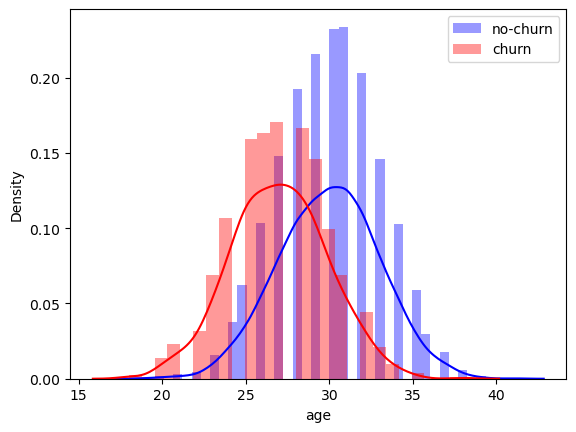

C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


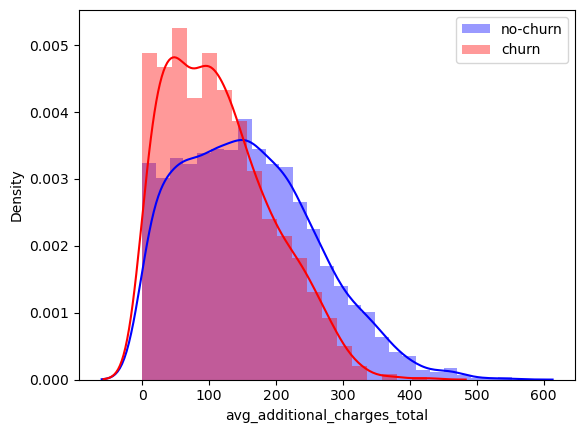

C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


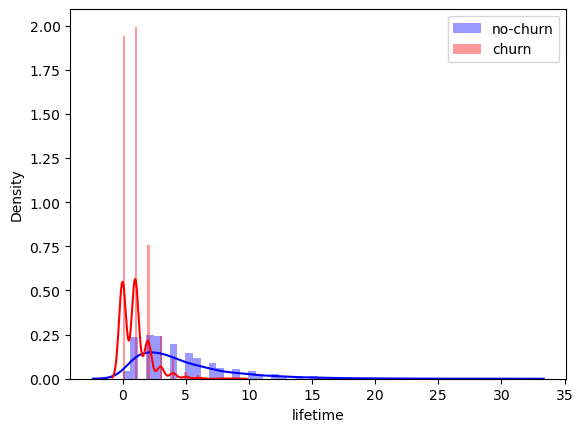

C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


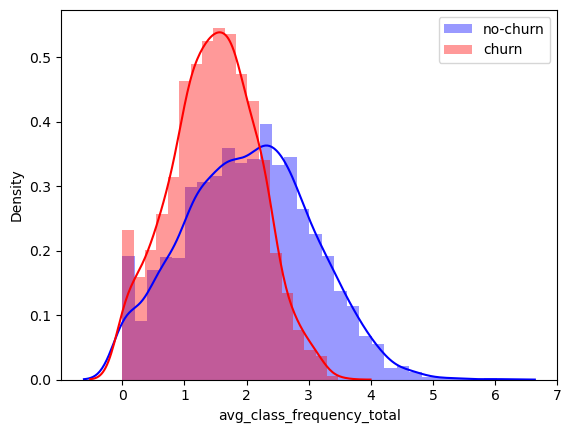

C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nicol\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


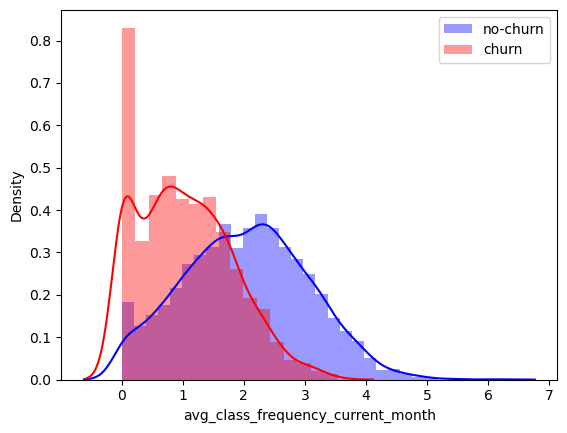

In [9]:
#creando histogramas según cancelaron o no para cracterísticas cuantitativas
for col in [col for col in cuantitative_df.columns if col != "churn"]:
    sns.distplot(cuantitative_df[cuantitative_df["churn"] == 0][col], color = "blue", label="no-churn")
    sns.distplot(cuantitative_df[cuantitative_df["churn"] == 1][col], color = "red", label="churn")
    plt.legend()
    plt.show()

In [10]:
#creando un df para las variables categóricas
categorical_df = df.drop(cuantitative_features, axis = 1)
categorical_df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,month_to_end_contract,churn
0,1,1,1,1,0,6,1,5.0,0
1,0,1,0,0,1,12,1,12.0,0
2,0,1,1,0,1,1,0,1.0,0
3,0,1,1,1,1,12,1,12.0,0
4,1,1,1,1,1,1,0,1.0,0


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


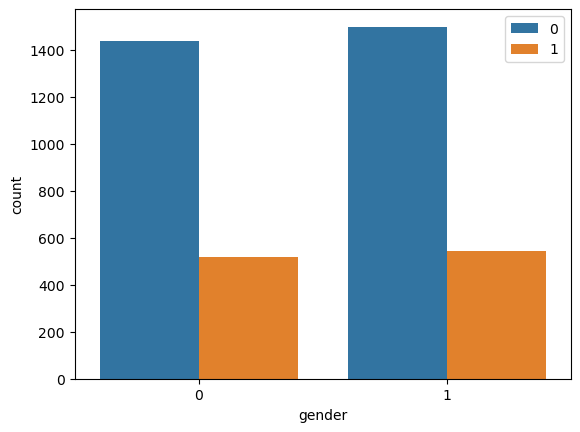

C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


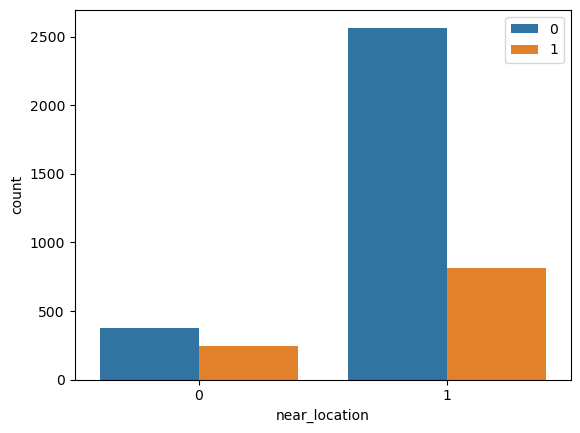

C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


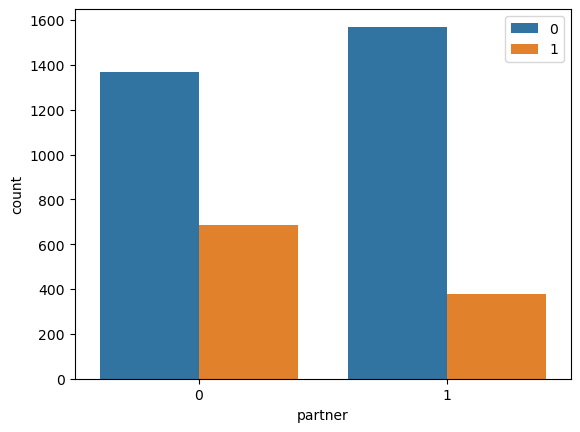

C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


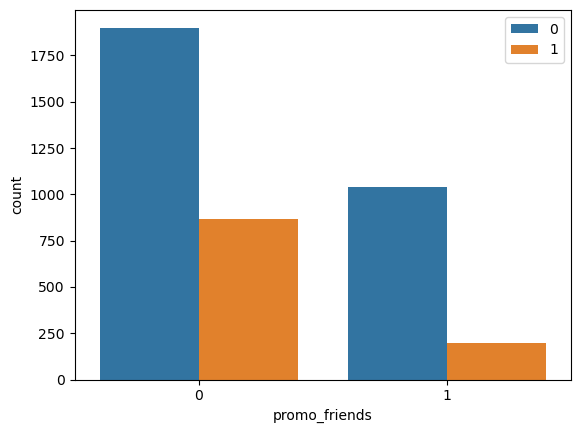

C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


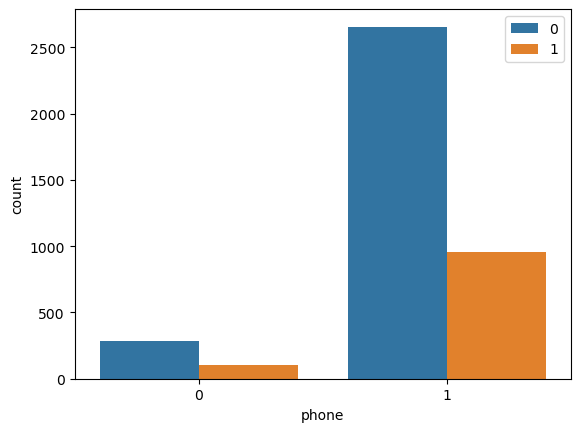

C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


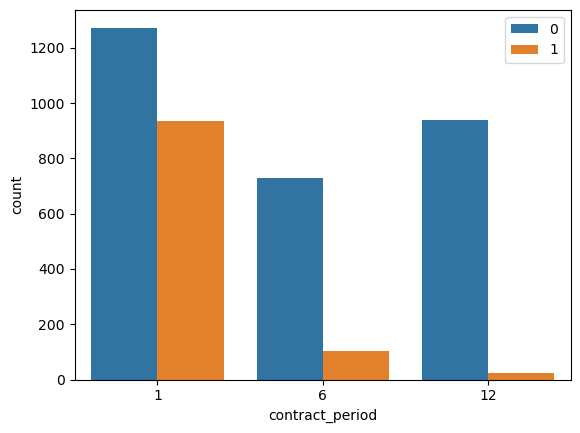

C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


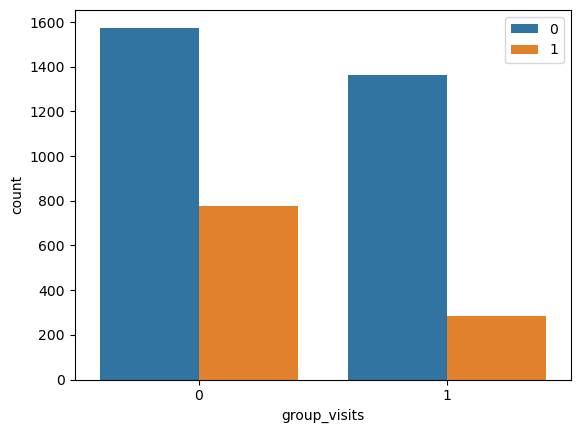

C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\3707152514.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


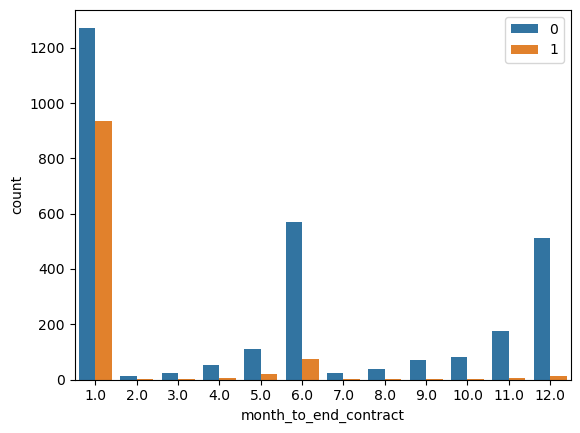

In [11]:
#creando gráfico de barras según cancelaron o no para cracterísticas categóricas
for col in [col for col in categorical_df.columns if col != "churn"]:
    new_df = categorical_df[[col, "churn"]]
    new_df["count"] = new_df[col]
    churn_list = new_df.groupby([col, "churn"]).agg({"count":"count"}).sort_values(by=col, ascending=False).reset_index()
    #fig = px.bar(churn_list, x=col, y="count", color="churn")
    #fig.show()
    sns.barplot(x=col, y="count", hue="churn", data=churn_list)
    plt.legend()
    plt.show()

Se observa lo siguiente:
- El género, teléfono y la edad no afecta tanto como otras características.
- Los usuarios que viven lejos son una pequeña parte pero en proporción tienden a cancelar más.
- Los que cancelan contratan en promedio un mes y los que se quedan en promedio 6 meses.
- Cancela con mayor frecuencia gente que no tiene descuento de promo_friend.
- Los usuarios que no participan en sesiones grupales tienden a cancelar más que los que si participan.

In [12]:
#creando matriz de correlación de variables cuantitativas
cuantitative_df.drop("churn", axis=1).corr()

,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
age,1.000000,0.080240,0.164693,0.119953,0.183095
avg_additional_charges_total,0.080240,1.000000,0.079028,0.044426,0.079570
lifetime,0.164693,0.079028,1.000000,0.112338,0.181975
avg_class_frequency_total,0.119953,0.044426,0.112338,1.000000,0.952739
avg_class_frequency_current_month,0.183095,0.079570,0.181975,0.952739,1.000000


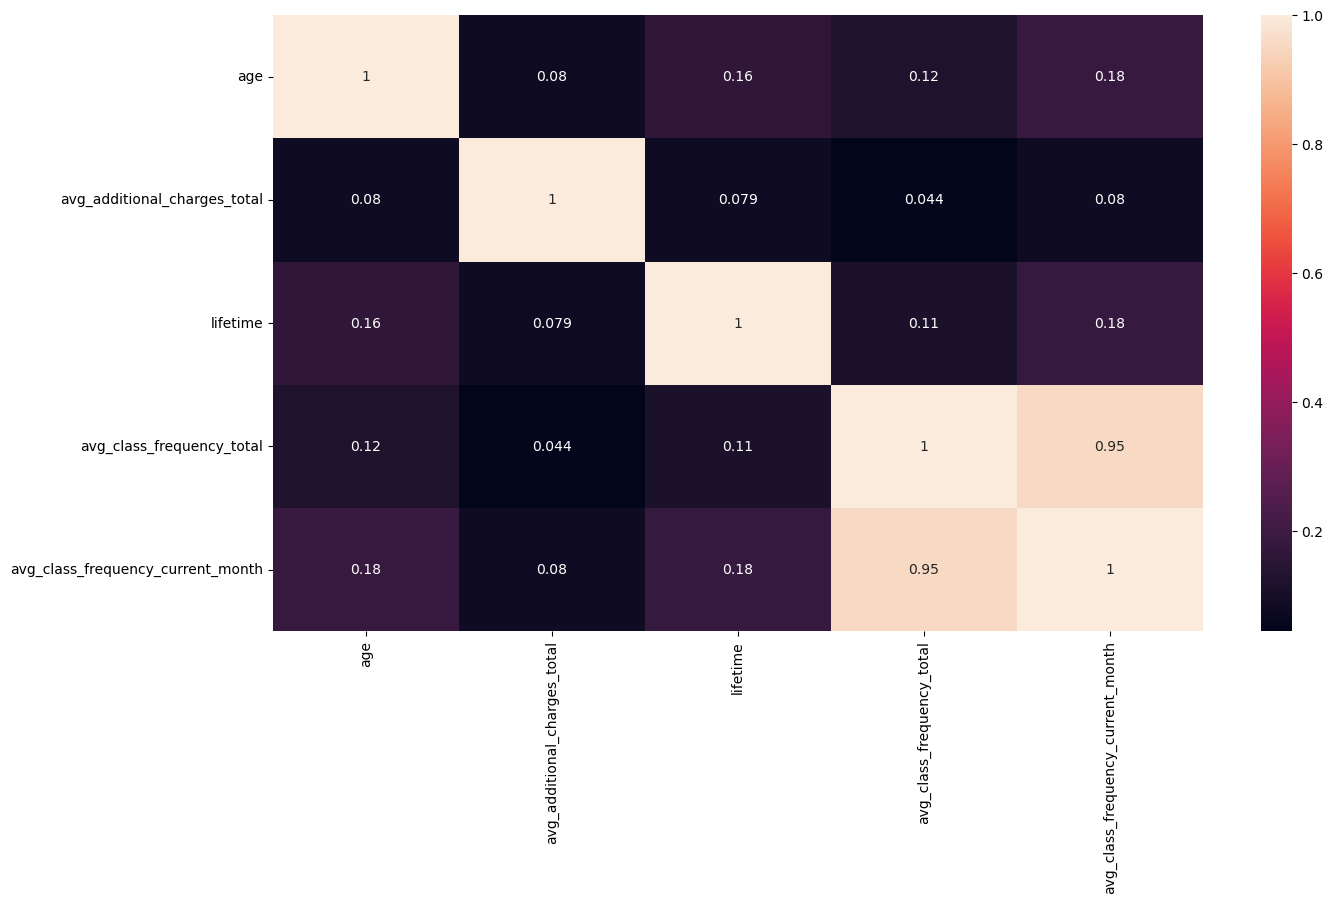

In [13]:
#creando un mapa de calor de variables cuantitativas
plt.figure(figsize=(15,8))
sns.heatmap(cuantitative_df.drop("churn", axis=1).corr(), annot = True)
plt.show()

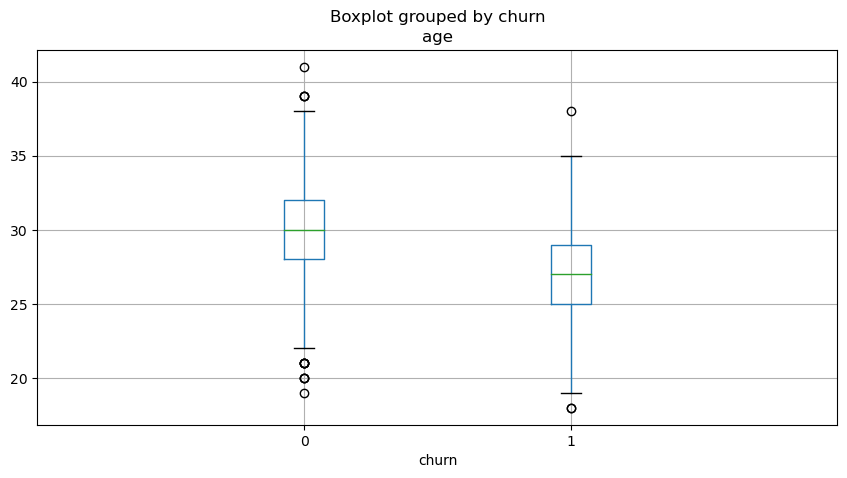

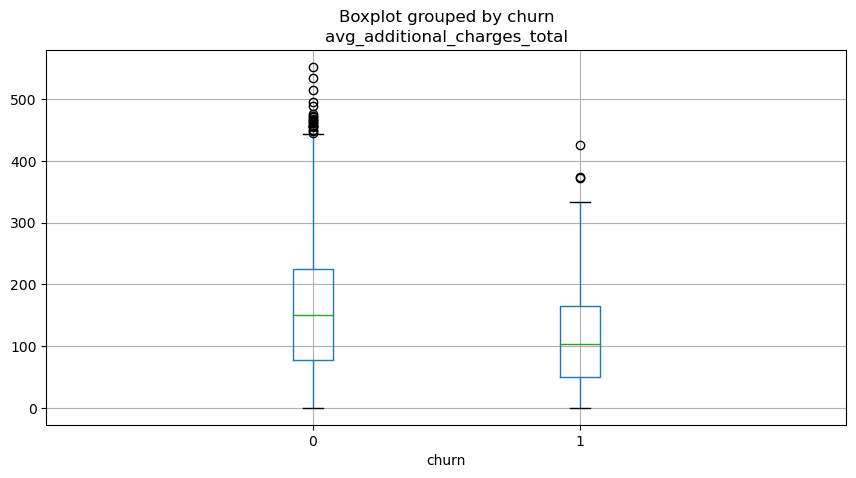

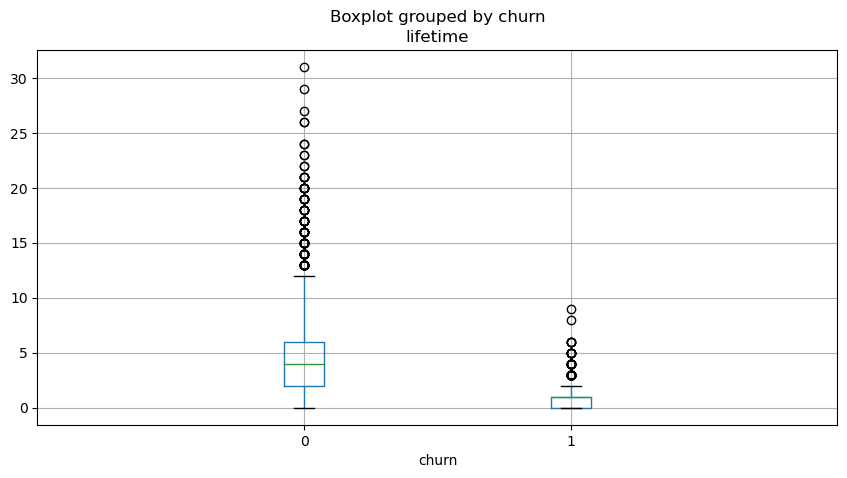

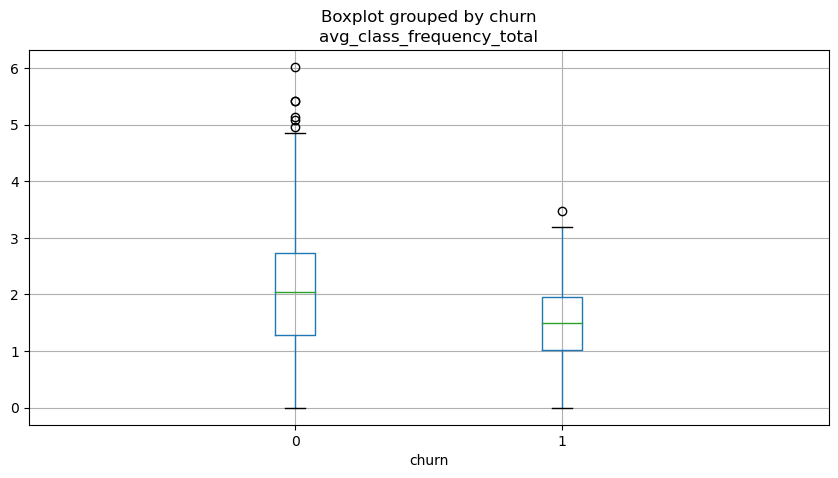

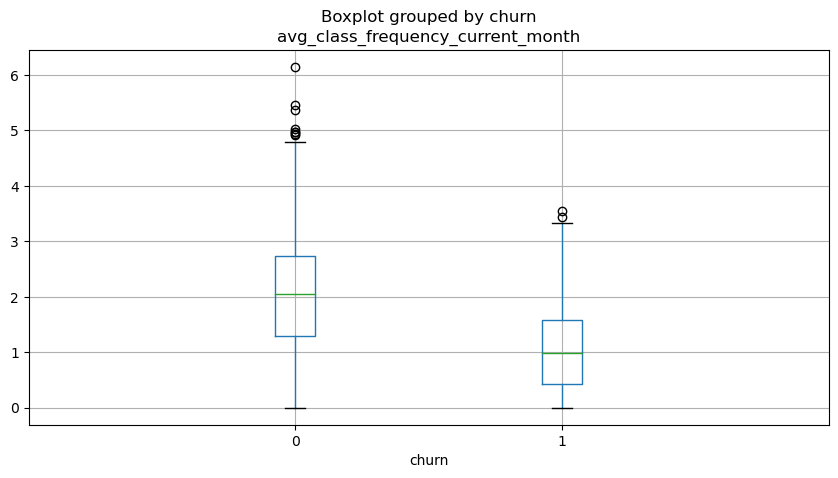

In [14]:
for col in [col for col in cuantitative_df.columns if col != "churn"]:
    cuantitative_df.boxplot(column=col, by="churn", figsize=(10,5))
    plt.xlim(0,3)
    plt.show()

Se observa que las únicas variables con alta correlación son "avg_class_frequency_total" y "avg_class_frequency_current_month".

Las personas que cancelan en general contratan 1 solo mes.

# CONSTRUCCIÓN DE MODELO PREDICTORIO

In [15]:
#separando características de la variable objetivo
y = df["churn"]
X = df.drop(["churn"], axis = 1)

In [16]:
#segmentando los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)

In [17]:
#creando función que toma modelo y datos como métricas input y output
lr_model = LogisticRegression(max_iter = 1000, random_state = 200)
rf_model = RandomForestClassifier(n_estimators = 150, random_state = 200)

In [18]:
#entrenando los modelos
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=200)

In [19]:
#calculando las predicciones en base a los datos reales
lr_preds = lr_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [20]:
#calculando exactitud, precisión y recall
print(f"""
accuracy LR: {accuracy_score(y_test, lr_preds)}
accuracy RF: {accuracy_score(y_test, rf_preds)}

precision LR: {precision_score(y_test, lr_preds)}
precision RF: {precision_score(y_test, rf_preds)}

recall LR: {recall_score(y_test, lr_preds)}
recall RF: {recall_score(y_test, rf_preds)}
""")


accuracy LR: 0.91625
accuracy RF: 0.9025

precision LR: 0.8761904761904762
precision RF: 0.8516746411483254

recall LR: 0.8177777777777778
recall RF: 0.7911111111111111



Se puede observar que en este caso el modelo de regresión lineal es mejor que el de bosque aleatorio, pues tiene un mayor porcentaje de predicciones exactas.

# CLÚSTERES DE USUARIOS

In [21]:
#estandarizando los datos
scaler = StandardScaler()
scaler.fit_transform(X_train)
StandardScaler()

StandardScaler()

In [22]:
#observando X_train
X_train

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
806,1,1,0,0,1,1,0,23,215.930003,1.0,4,1.283945,0.599889
251,0,1,0,1,1,6,0,34,111.643964,6.0,3,1.751059,1.796576
1816,1,1,1,1,1,6,0,32,222.527499,6.0,4,2.263839,2.342150
3733,0,1,1,1,1,6,0,29,273.508451,6.0,4,2.198012,2.395982
3969,0,1,0,0,1,6,0,30,147.125884,6.0,3,1.471511,1.485913
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,1,1,1,1,1,6,0,26,241.885956,4.0,3,1.477087,1.552703
1860,0,0,0,0,1,1,0,36,362.345525,1.0,3,3.621084,3.673442
784,0,1,1,0,0,6,1,33,6.506291,5.0,10,1.282481,1.235841
617,1,1,0,0,1,1,1,26,222.291129,1.0,1,2.015302,2.097300


In [23]:
#estandarizando los datos
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [24]:
#observando X_train estandarizado (X_train_sc)
X_train_sc

array([[ 0.96257481,  0.42265494, -0.97469506, ...,  0.06409946,
        -0.62401786, -1.1213413 ],
       [-1.03888029,  0.42265494, -0.97469506, ..., -0.19820013,
        -0.14421006,  0.01531436],
       [ 0.96257481,  0.42265494,  1.0259619 , ...,  0.06409946,
         0.38250491,  0.53352007],
       ...,
       [-1.03888029,  0.42265494,  1.0259619 , ...,  1.63789705,
        -0.62552159, -0.51729127],
       [ 0.96257481,  0.42265494, -0.97469506, ..., -0.72279933,
         0.12721414,  0.30095214],
       [ 0.96257481,  0.42265494,  1.0259619 , ...,  0.85099826,
         0.36839966,  0.55221552]])

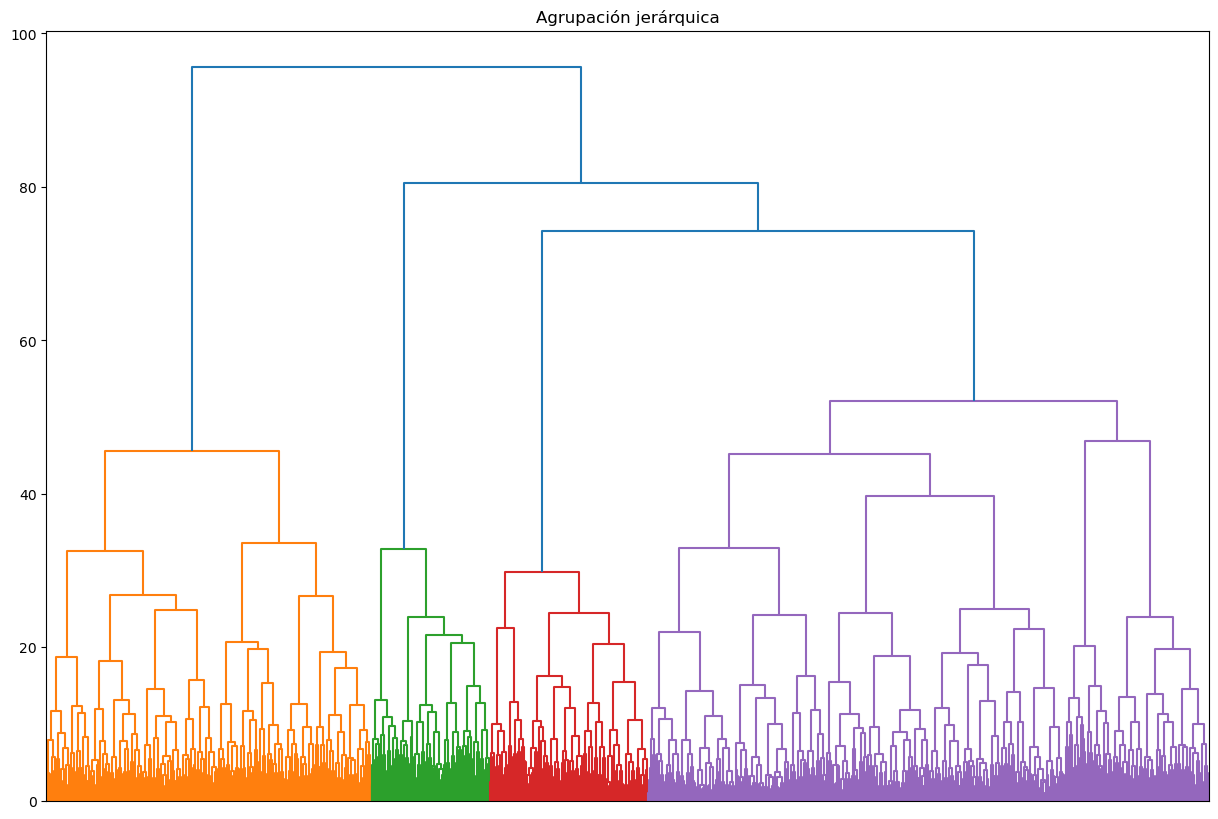

In [25]:
#creando dendrograma
linked = linkage(X_train_sc, method = "ward")
plt.figure(figsize=(15,10))
dendrogram(linked, orientation = "top")
plt.title("Agrupación jerárquica")
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
plt.show()

El dendograma separa los datos en 4 clústeres de clientes.

In [26]:
#separando en clústeres
kmeans = KMeans(n_clusters = 5, random_state = 200).fit(X_train_sc)
labels = kmeans.labels_
davies_bouldin_score(X_train_sc, labels)

1.960028989510997

In [27]:
#separando en clústeres
kmeans = KMeans(n_clusters = 6, random_state = 200).fit(X_train_sc)
labels = kmeans.labels_
davies_bouldin_score(X_train_sc, labels)

1.876002037283672

Al parecer, separar en 6 clústeres es mejor que 5, ya que el número está más cercano a 0.

In [28]:
#obteniendo los valores medios
kmeans.cluster_centers_

array([[ 0.05450722,  0.06116312, -0.04229012, -0.01224959, -2.95405548,
        -0.00297395,  0.00846395,  0.01426253, -0.05347283,  0.01788   ,
         0.03009766, -0.07480591, -0.09044315],
       [-0.05826786,  0.42265494, -0.49715132, -0.62925149,  0.33851768,
        -0.59563922, -0.18718504, -0.33597544, -0.20346096, -0.5778348 ,
        -0.35373457, -0.60730617, -0.68745984],
       [-0.05760533,  0.42265494,  0.67595496,  1.49380013,  0.33851768,
        -0.33024706,  0.07463993, -0.01938874, -0.02258492, -0.33151416,
         0.06296642, -0.16701728, -0.13896973],
       [-0.03815274, -2.36599623, -0.01519632, -0.485017  ,  0.33851768,
        -0.52596048, -0.41818799, -0.18368281, -0.15213131, -0.52452978,
        -0.22228887, -0.20214647, -0.24591127],
       [-0.02464967,  0.28468569,  0.5010519 ,  0.4171906 ,  0.32864489,
         1.5911748 ,  0.3010855 ,  0.23922359,  0.17617937,  1.56868343,
         0.22140057,  0.13321064,  0.22233052],
       [ 0.15553647,  0.332698

In [29]:
#guardando la lista de características
features = list(X_train.columns)

In [30]:
#creando un df para visualizar mejor los valores medios de los clústeres
centroids_df = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
centroids_df.columns = features
centroids_df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0.546296,8.703704e-01,0.466049,0.302469,3.330669e-16,4.657407,0.416667,29.237654,141.486194,4.373457,3.870370,1.818627,1.685233
1,0.489950,1.000000e+00,0.238693,0.017588,1.000000e+00,1.961055,0.320352,28.090452,126.926337,1.884422,2.407035,1.300215,1.056686
2,0.490281,1.000000e+00,0.825054,0.997840,1.000000e+00,3.168467,0.449244,29.127430,144.484589,2.913607,3.995680,1.728855,1.634144
3,0.500000,-3.330669e-16,0.479592,0.084184,1.000000e+00,2.278061,0.206633,28.589286,131.909080,2.107143,2.908163,1.694655,1.521554
4,0.506747,9.505247e-01,0.737631,0.500750,9.970015e-01,11.910045,0.560720,29.974513,163.779313,10.853073,4.599700,2.021140,2.014526
5,0.596774,9.677419e-01,0.279570,0.080645,9.946237e-01,2.818996,0.478495,30.272401,169.616362,2.553763,5.000000,2.895306,2.891695


Las características "partner", "promo_friends", "contract_period", "month_to_end_contract" no son muy homogeneos entre clústeres.

In [31]:
kmean_preds = kmeans.predict(X_train_sc)
kmean_preds_df = X_train
kmean_preds_df["group"] = kmean_preds
kmean_preds_df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,group
806,1,1,0,0,1,1,0,23,215.930003,1.0,4,1.283945,0.599889,1
251,0,1,0,1,1,6,0,34,111.643964,6.0,3,1.751059,1.796576,2
1816,1,1,1,1,1,6,0,32,222.527499,6.0,4,2.263839,2.342150,2
3733,0,1,1,1,1,6,0,29,273.508451,6.0,4,2.198012,2.395982,2
3969,0,1,0,0,1,6,0,30,147.125884,6.0,3,1.471511,1.485913,1


In [32]:
#recordando los nombres de las columnas
print(categorical_features)
print(cuantitative_features)

['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'month_to_end_contract']
['age', 'avg_additional_charges_total', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']


AGE


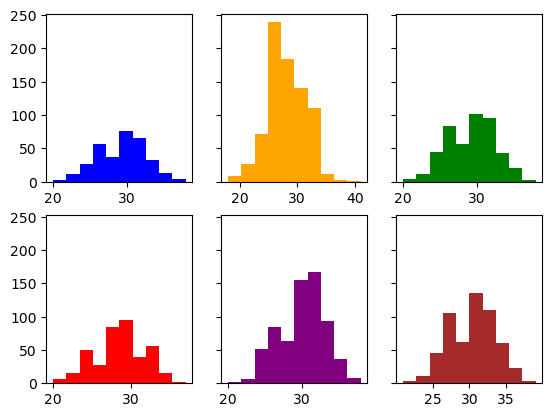

AVG_ADDITIONAL_CHARGES_TOTAL


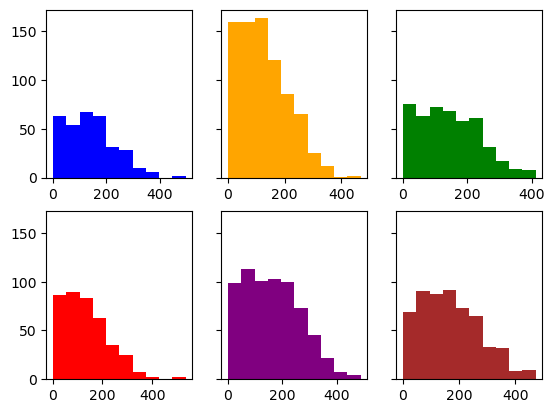

LIFETIME


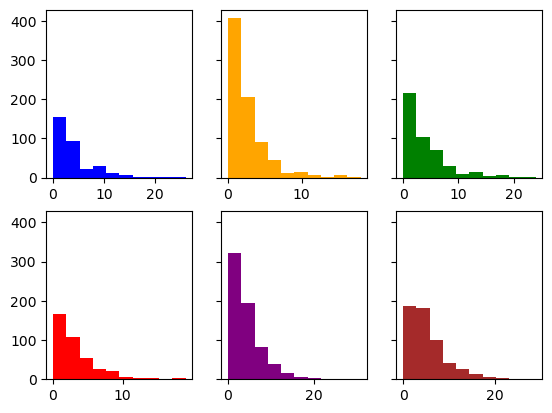

AVG_CLASS_FREQUENCY_TOTAL


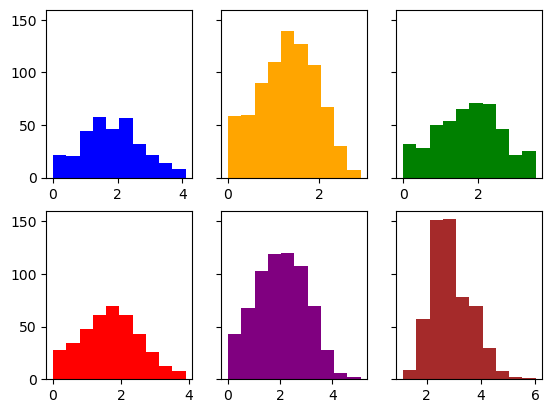

AVG_CLASS_FREQUENCY_CURRENT_MONTH


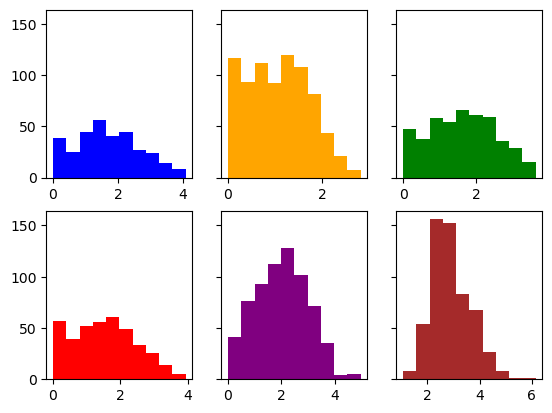

In [33]:
for col in cuantitative_features:
    print(col.upper())
    fig, ax = plt.subplots(2, 3, sharey = True)
    ax[0, 0].hist(kmean_preds_df[kmean_preds_df["group"] == 0][col], color = "blue", label = "group-0")
    ax[0, 1].hist(kmean_preds_df[kmean_preds_df["group"] == 1][col], color = "orange", label = "group-1")
    ax[0, 2].hist(kmean_preds_df[kmean_preds_df["group"] == 2][col], color = "green", label = "group-2")
    ax[1, 0].hist(kmean_preds_df[kmean_preds_df["group"] == 3][col], color = "red", label = "group-3")
    ax[1,1].hist(kmean_preds_df[kmean_preds_df["group"] == 4][col], color = "purple", label = "group-4")
    ax[1,2].hist(kmean_preds_df[kmean_preds_df["group"] == 5][col], color = "brown", label = "group-5")
    plt.show()

GENDER


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


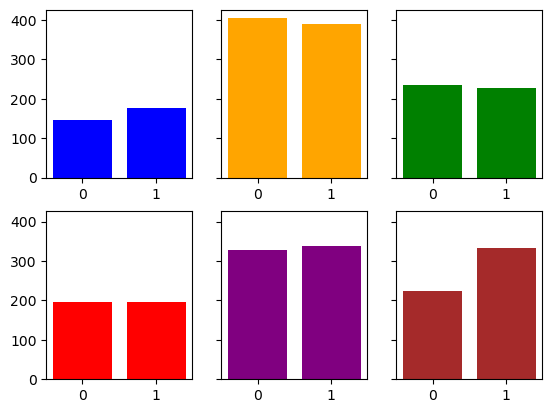

NEAR_LOCATION


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


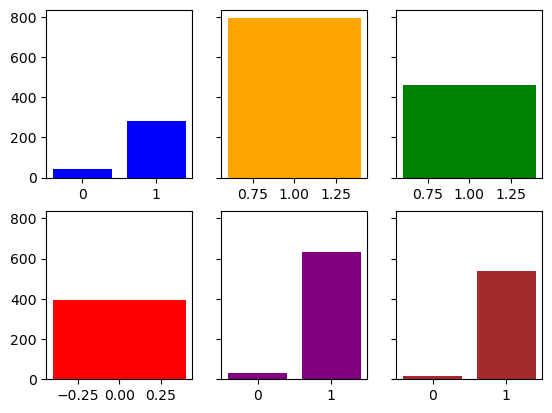

PARTNER


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


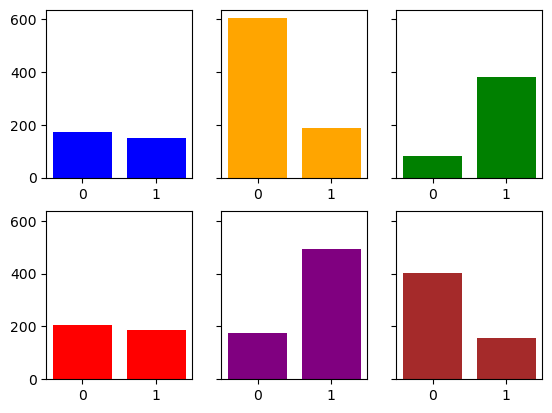

PROMO_FRIENDS


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


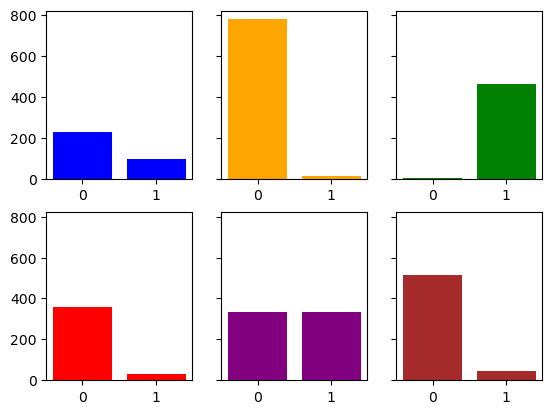

PHONE


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


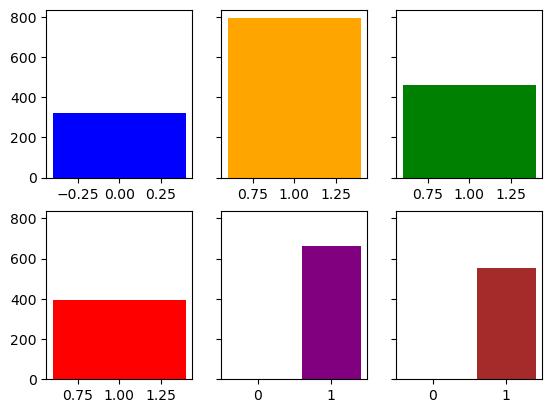

CONTRACT_PERIOD


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


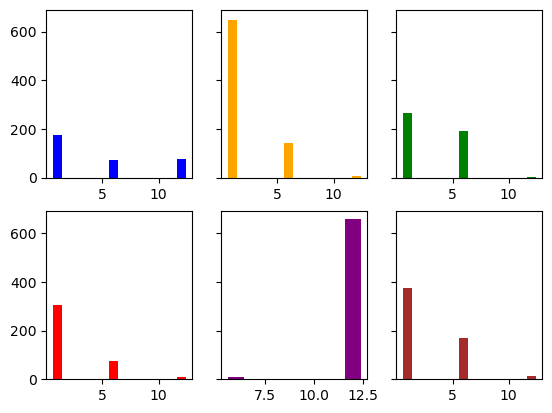

GROUP_VISITS


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


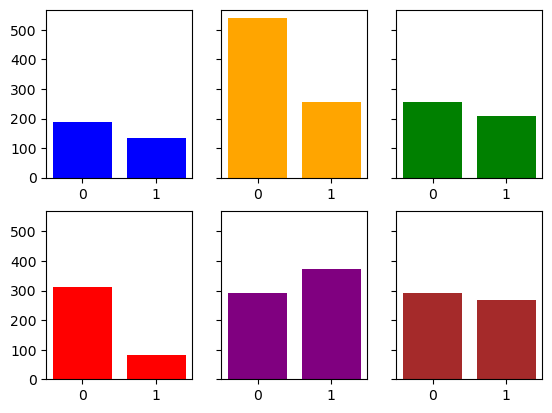

MONTH_TO_END_CONTRACT


C:\Users\nicol\AppData\Local\Temp\ipykernel_20896\1060214284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["count"] = new_df[col]


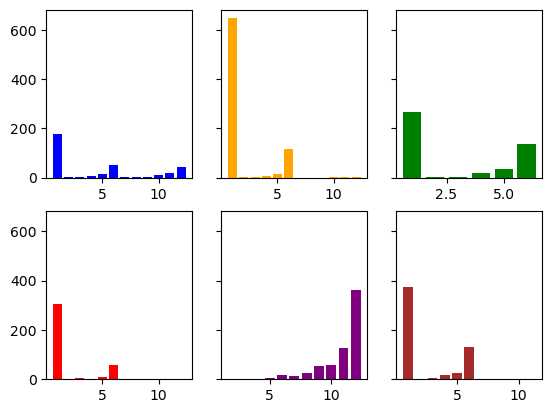

In [34]:
for col in categorical_features:
    print(col.upper())
    new_df = kmean_preds_df[[col,"group"]]
    new_df["count"] = new_df[col]
    group_list = new_df.groupby([col, "group"]).agg({"count":"count"}).sort_values(by=col, ascending=False).reset_index()
    fig, ax = plt.subplots(2, 3, sharey = True)
    ax[0, 0].bar(group_list[group_list["group"] == 0][col], group_list[group_list["group"] == 0]["count"], color = "blue")
    ax[0, 1].bar(group_list[group_list["group"] == 1][col], group_list[group_list["group"] == 1]["count"], color = "orange")
    ax[0, 2].bar(group_list[group_list["group"] == 2][col], group_list[group_list["group"] == 2]["count"], color = "green")
    ax[1, 0].bar(group_list[group_list["group"] == 3][col], group_list[group_list["group"] == 3]["count"], color = "red")
    ax[1,1].bar(group_list[group_list["group"] == 4][col], group_list[group_list["group"] == 4]["count"], color = "purple")
    ax[1,2].bar(group_list[group_list["group"] == 5][col], group_list[group_list["group"] == 5]["count"], color = "brown")
    plt.show()

El grupo 0:

    - Acumula más gente sin descuento "promo_friend"
    - Acumula más gente que no entrega su teléfono
    
El grupo 1:

    - Acumula más gente entre 20 y 30 años
    - Acumula más gente sin descuento "partner"
    - Acumula más gente sin descuento "promo_friend"
    - Acumula más gente que no entrega su teléfono
    - Acumula más gente que contrata solo por un mes
    - Acumula más gente que no va a clases grupales
    
El grupo 2:

    - Acumula más gente con descuento "partner"
    - Acumula más gente con descuento "promo_friend"
    - Acumula más gente que no entrega su teléfono
    
El grupo 3:

    - Acumula más gente entre 20 y 30 años
    - Acumula más gente sin descuento "promo_friend"
    - Acumula más gente que no entrega su teléfono
    - Acumula más gente que no va a clases grupales
    
El grupo 4:

    - Acumula más gente entre los 30 y 40 años
    - Acumula más gente que vive cerca
    - Acumula más gente con descuento "partner"
    - Acumula más gente que si entrega su teléfono
    - Acumula más gente que contrata por 12 meses
    - Acumula más gente que si va a clases grupales
    
El grupo 5:

    - Acumula más gente entre los 30 y 40 años
    - Acumula más gente que vive cerca
    - Acumula más gente sin descuento "partner"
    - Acumula más gente sin descuento "promo_friend"
    - Acumula más gente que si entrega su teléfono

In [35]:
#graficando las distribuciones de las características de los clústeres
#for col in cuantitative_features:
#    sns.kdeplot(kmean_preds_df[kmean_preds_df["group"] == 0][col], color = "blue", label = "group-0")
#    sns.kdeplot(kmean_preds_df[kmean_preds_df["group"] == 1][col], color = "green", label = "group-1")
#    sns.kdeplot(kmean_preds_df[kmean_preds_df["group"] == 2][col], color = "orange", label = "group-2")
#    sns.kdeplot(kmean_preds_df[kmean_preds_df["group"] == 3][col], color = "purple", label = "group-3")
#    sns.kdeplot(kmean_preds_df[kmean_preds_df["group"] == 4][col], color = "red", label = "group-4")
#    plt.legend()
#    plt.show()

In [36]:
kmean_preds_df["target"] = y_train

In [37]:
#calculando las medias de la variable objetivo de cada clúster
kmean_preds_df.groupby("group")["target"].mean()

group
0    0.268519
1    0.532663
2    0.241901
3    0.423469
4    0.019490
5    0.060932
Name: target, dtype: float64

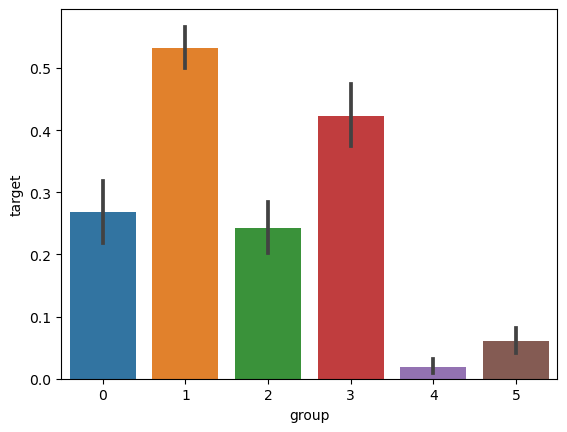

In [38]:
#graficando la variable objetivo de cada clúster
sns.barplot(data=kmean_preds_df, x="group", y="target")
plt.show()

# CONCLUSIONES Y RECOMENDACIONES

En el análisis exploratorio de datos se concluyó lo siguiente:

- El género no afecta a la variable objetivo.
- Los usuarios que viven lejos son una pequeña parte pero en proporción tienden a cancelar más.
- Los que cancelan contratan en promedio un mes y los que se quedan en promedio 6-12 meses.
- Cancela con mayor frecuencia gente que no tiene descuento de partner o promo_friend.
- Los usuarios que no participan en sesiones grupales tienden a cancelar más que los que si participan.

Y gracias al análisis con los clústeres se puede concluir que:

- El grupo 1 y 3 son los más propensos a cancelar. Mientras que el grupo 4 y 5 son los que menos cancelan.

- Si comparamos el grupo 1 con el grupo 4 podemos destacar que:
        * la gente entre 20-30 cancela más que la gente entre 30-40 años.
        * el género no afecta
        * los clientes que viven cerca cancelan menos
        * los grupos que tienen más descuento partner cancelan menos
        * el grupo 1 tiene muy pocos clientes con descuento "promo friends" y el grupo 4 es más equilibrado, esto tambien puede
        afectar.
        * Los clientes que contratan por 1 o 6 meses tienden a cancelar más, mientras que los que contratan por un año no.
        * Asistir a clases grupales también tiende a mantener a los clientes.
        
Finalmente, se recomienda crear alguna promoción que invite al cliente a probar el gimnacio más de un mes, incentivándolo a que si paga el año completo le será más barato y tendrá mayores beneficios. También se recomienda invitar a los clientes a probar las clases grupales, ya que estas incentivan al compromiso con el profesor y genera un lazo con los compañeros, lo cual podría motivar volver al gimnacio.